In [68]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_moons
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [69]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.boston_housing.load_data()

In [70]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

xtrain = tf.cast(xtrain, dtype=tf.float32)
xtest = tf.cast(xtest, dtype=tf.float32)
ytrain = tf.cast(ytrain, dtype=tf.float32)
ytest = tf.cast(ytest, dtype=tf.float32)


In [85]:
def load_array(features, batch_size, is_train = True):
    data = tf.data.Dataset.from_tensor_slices(features)
    data = data.shuffle(buffer_size = 1000)
    data = data.batch(batch_size)
    return data

def init_params():
    """ Initialize w, b"""
    w = tf.Variable(tf.random.normal(shape = (xtrain.shape[1], 1), mean = 0, stddev= 0.1), trainable = True)
    b = tf.Variable(tf.zeros(1), trainable = True)
    return w, b

def lin_reg(X, w, b):
    """ Linear Regression : y = wx + b """
    return tf.matmul(X, w) + b

def squared_loss(yhat, y):
    return (yhat - tf.reshape(y, yhat.shape))**2/2

def sgd(params, grads, lr, batch_size):
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

def sgd_momentum(params, vels, grads, lr, momentum, batch_size):
    for param, vel, grad in zip(params, vels, grads):
            vel[:].assign(momentum * vel + grad/batch_size)
            param[:].assign(param - lr * vel)

def init_momentum_states(features_dim):
    v_w = tf.Variable(tf.zeros((features_dim, 1)))
    v_b = tf.Variable(tf.zeros(1))
    return (v_w, v_b)

In [90]:
lr = 0.03
momentum = 0.9
num_epochs = 100
batch_size = 32

w, b = init_params()
training_loss = []
for epoch in range(num_epochs):
    for X, y in load_array((xtrain, ytrain), batch_size):
        X, y = tf.cast(X, dtype=tf.float32), tf.cast(y, dtype=tf.float32)
        with tf.GradientTape() as tape:
            # Do forward prop & Compute loss
            yhat = lin_reg(X, w, b)
            loss = squared_loss(yhat, y)

        # Compute Gradient
        dw, db = tape.gradient(loss, [w, b])

        # Update w, b with momentum
        v_w, v_b = init_momentum_states(xtrain.shape[1])
        sgd_momentum([w, b], [v_w, v_b], [dw, db], lr, momentum, batch_size)

    epoch_loss = np.round(tf.reduce_mean(squared_loss(lin_reg(xtrain, w, b), ytrain)), 2)
    training_loss.append(epoch_loss)
    if epoch % 10 == 0:
        print(f"epoch : {epoch}, training_loss : {epoch_loss}")

epoch : 0, training_loss : 135.17999267578125
epoch : 10, training_loss : 11.699999809265137
epoch : 20, training_loss : 11.319999694824219
epoch : 30, training_loss : 11.119999885559082
epoch : 40, training_loss : 11.0600004196167
epoch : 50, training_loss : 11.050000190734863
epoch : 60, training_loss : 11.039999961853027
epoch : 70, training_loss : 11.020000457763672
epoch : 80, training_loss : 11.020000457763672
epoch : 90, training_loss : 11.029999732971191


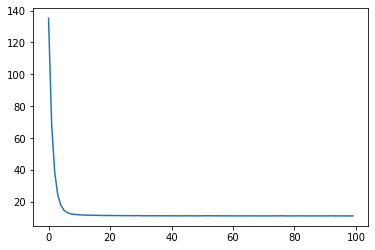

In [91]:
plt.plot(np.arange(num_epochs), training_loss)